In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\aysha\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")  

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Identifying the unique values in each columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
numerical_values=['Age','DailyRate','DistanceFromHome', 'Education','EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [9]:
categorical_values=['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime']

In [10]:
# Finding the missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


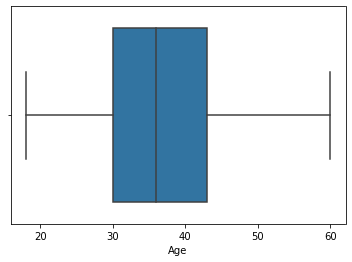

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


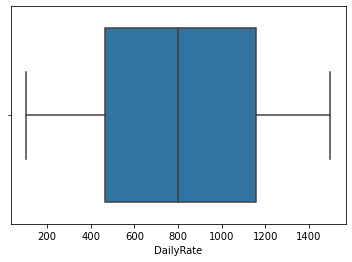

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


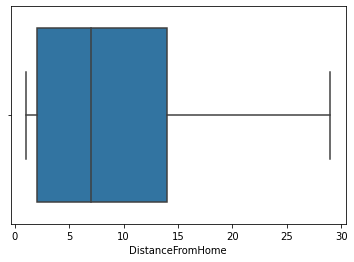

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


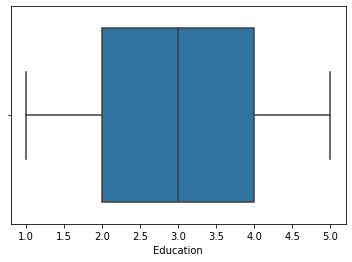

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


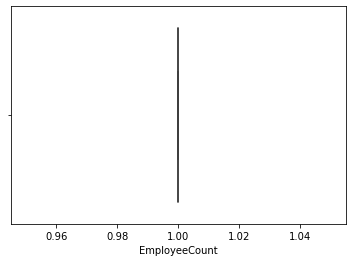

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


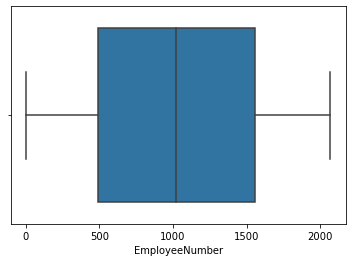

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


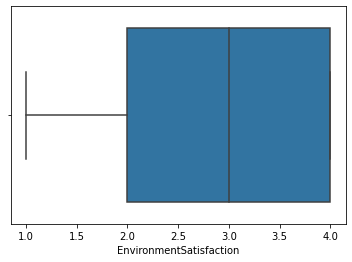

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


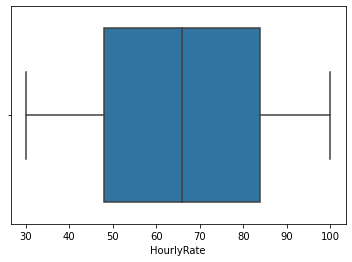

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


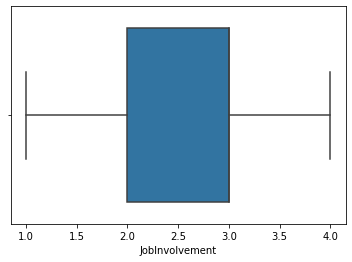

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


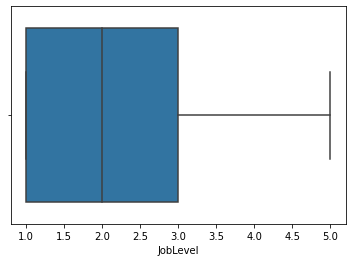

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


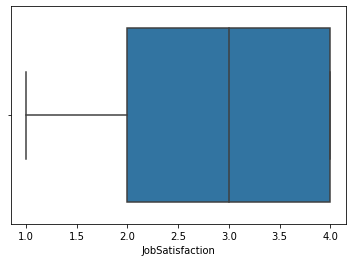

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


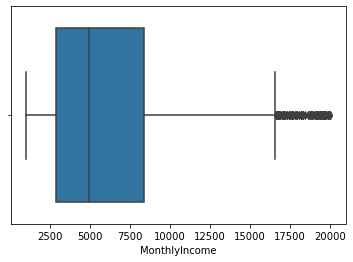

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


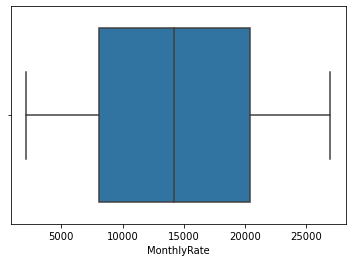

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


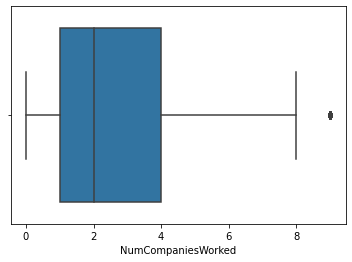

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


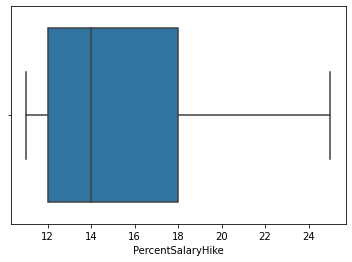

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


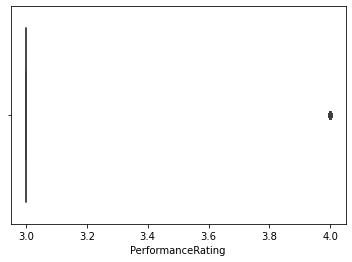

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


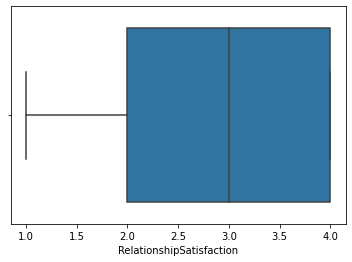

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


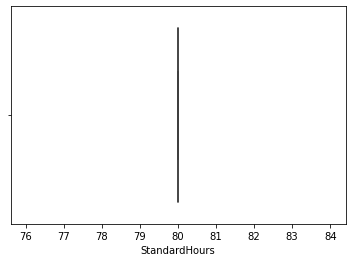

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


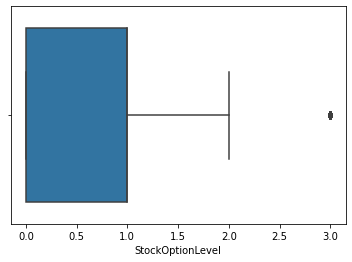

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


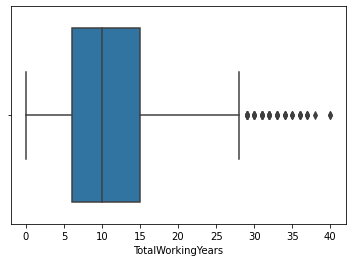

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


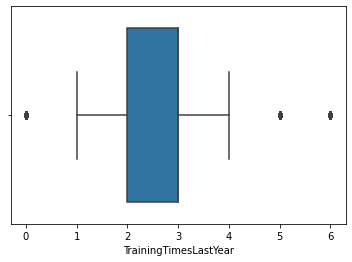

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


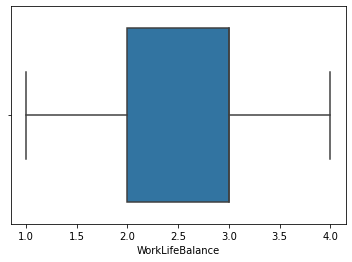

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


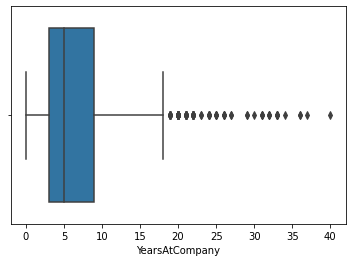

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


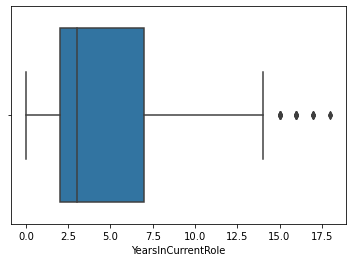

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


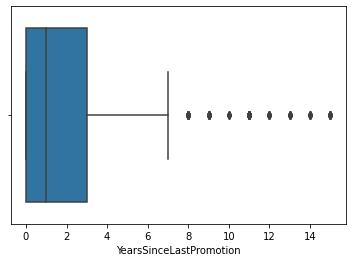

C:\Users\aysha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


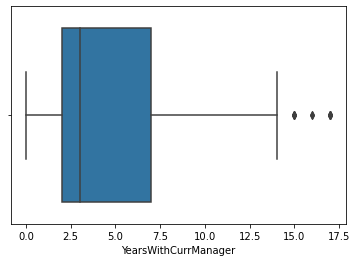

In [12]:
# To find outlierrs
for i in numerical_values:
    sns.boxplot(df[i])
    plt.show()

In [13]:
df.loc[df['Attrition']=='No','Attrition_']='NO-still_employed'
df.loc[df['Attrition']=='Yes','Attrition_']='YES-left_the_company'

In [14]:
df.loc[df['Attrition']=='No','Attrition_encoded']='0'
df.loc[df['Attrition']=='Yes','Attrition_encoded']='1'

In [15]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_,Attrition_encoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,YES-left_the_company,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,NO-still_employed,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,YES-left_the_company,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,NO-still_employed,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,NO-still_employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,17,3,3,5,2,0,3,NO-still_employed,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,9,5,3,7,7,1,7,NO-still_employed,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,1,6,0,3,6,2,0,3,NO-still_employed,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,17,3,2,9,6,0,8,NO-still_employed,0


In [16]:
df=df.drop(columns=['Attrition_encoded','Attrition_encoded'])

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,YES-left_the_company
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,NO-still_employed
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,YES-left_the_company
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,NO-still_employed
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,NO-still_employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,NO-still_employed
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,NO-still_employed
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,NO-still_employed
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,NO-still_employed


In [18]:
categorical_values

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [19]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [24]:
le= LabelEncoder()
df['OverTime_LabelEncoded'] = le.fit_transform(df['OverTime'])
df['BusinessTravel_LabelEncoded'] = le.fit_transform(df['BusinessTravel'])
df['Department_LabelEncoded'] = le.fit_transform(df['Department'])
df['EducationField_LabelEncoded'] = le.fit_transform(df['EducationField'])
df['Gender_LabelEncoded'] = le.fit_transform(df['Gender'])
df['JobRole_LabelEncoded'] = le.fit_transform(df['JobRole'])
df['MaritalStatus_LabelEncoded'] = le.fit_transform(df['MaritalStatus'])
df['Over18_LabelEncoded'] = le.fit_transform(df['Over18'])
df['Attrition_LabelEncoded'] = le.fit_transform(df['Attrition'])

In [25]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Attrition_,OverTime_LabelEncoded,BusinessTravel_LabelEncoded,Department_LabelEncoded,EducationField_LabelEncoded,Gender_LabelEncoded,JobRole_LabelEncoded,MaritalStatus_LabelEncoded,Over18_LabelEncoded,Attrition_LabelEncoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,YES-left_the_company,1,2,2,1,0,7,2,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,NO-still_employed,0,1,1,1,1,6,1,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,YES-left_the_company,1,2,1,4,1,2,2,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,NO-still_employed,1,1,1,1,0,6,1,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,NO-still_employed,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,NO-still_employed,0,1,1,3,1,2,1,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,NO-still_employed,0,2,1,3,1,0,1,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,NO-still_employed,1,2,1,1,1,4,1,0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,NO-still_employed,0,1,2,3,1,7,1,0,0


In [26]:
categoriacl_values=['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime']

In [27]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Attrition_,OverTime_LabelEncoded,BusinessTravel_LabelEncoded,Department_LabelEncoded,EducationField_LabelEncoded,Gender_LabelEncoded,JobRole_LabelEncoded,MaritalStatus_LabelEncoded,Over18_LabelEncoded,Attrition_LabelEncoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,YES-left_the_company,1,2,2,1,0,7,2,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,NO-still_employed,0,1,1,1,1,6,1,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,YES-left_the_company,1,2,1,4,1,2,2,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,NO-still_employed,1,1,1,1,0,6,1,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,NO-still_employed,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,NO-still_employed,0,1,1,3,1,2,1,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,NO-still_employed,0,2,1,3,1,0,1,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,NO-still_employed,1,2,1,1,1,4,1,0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,NO-still_employed,0,1,2,3,1,7,1,0,0


In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_', 'OverTime_LabelEncoded',
       'BusinessTravel_LabelEncoded', 'Department_LabelEncoded',
       'EducationField_LabelEncoded', 'Gender_LabelEncoded',
       'JobRole_LabelEncoded', 'MaritalStatus_LabelEncoded',
       'Over18_LabelEncoded', 'Attrition_LabelEncoded'],
      dtype='object')

In [29]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Attrition_,OverTime_LabelEncoded,BusinessTravel_LabelEncoded,Department_LabelEncoded,EducationField_LabelEncoded,Gender_LabelEncoded,JobRole_LabelEncoded,MaritalStatus_LabelEncoded,Over18_LabelEncoded,Attrition_LabelEncoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,YES-left_the_company,1,2,2,1,0,7,2,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,NO-still_employed,0,1,1,1,1,6,1,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,YES-left_the_company,1,2,1,4,1,2,2,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,NO-still_employed,1,1,1,1,0,6,1,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,NO-still_employed,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,NO-still_employed,0,1,1,3,1,2,1,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,NO-still_employed,0,2,1,3,1,0,1,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,NO-still_employed,1,2,1,1,1,4,1,0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,NO-still_employed,0,1,2,3,1,7,1,0,0


In [30]:
df1=df[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','Attrition_LabelEncoded','BusinessTravel_LabelEncoded','Department_LabelEncoded','EducationField_LabelEncoded','Gender_LabelEncoded','JobRole_LabelEncoded','MaritalStatus_LabelEncoded','Over18_LabelEncoded','OverTime_LabelEncoded']]

In [31]:
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition_LabelEncoded,BusinessTravel_LabelEncoded,Department_LabelEncoded,EducationField_LabelEncoded,Gender_LabelEncoded,JobRole_LabelEncoded,MaritalStatus_LabelEncoded,Over18_LabelEncoded,OverTime_LabelEncoded
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,0,1,1,3,1,2,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,7,0,2,1,3,1,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,3,0,2,1,1,1,4,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,8,0,1,2,3,1,7,1,0,0


In [32]:
df1 = df1.drop(columns=['Over18_LabelEncoded','EmployeeNumber','EmployeeCount','StandardHours'])

In [33]:
df1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_LabelEncoded,BusinessTravel_LabelEncoded,Department_LabelEncoded,EducationField_LabelEncoded,Gender_LabelEncoded,JobRole_LabelEncoded,MaritalStatus_LabelEncoded,OverTime_LabelEncoded
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,3,0,1,1,3,1,2,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,1,7,0,2,1,3,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,3,0,2,1,1,1,4,1,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,8,0,1,2,3,1,7,1,0


In [34]:
df2=df1[['Age','DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [35]:
df2

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


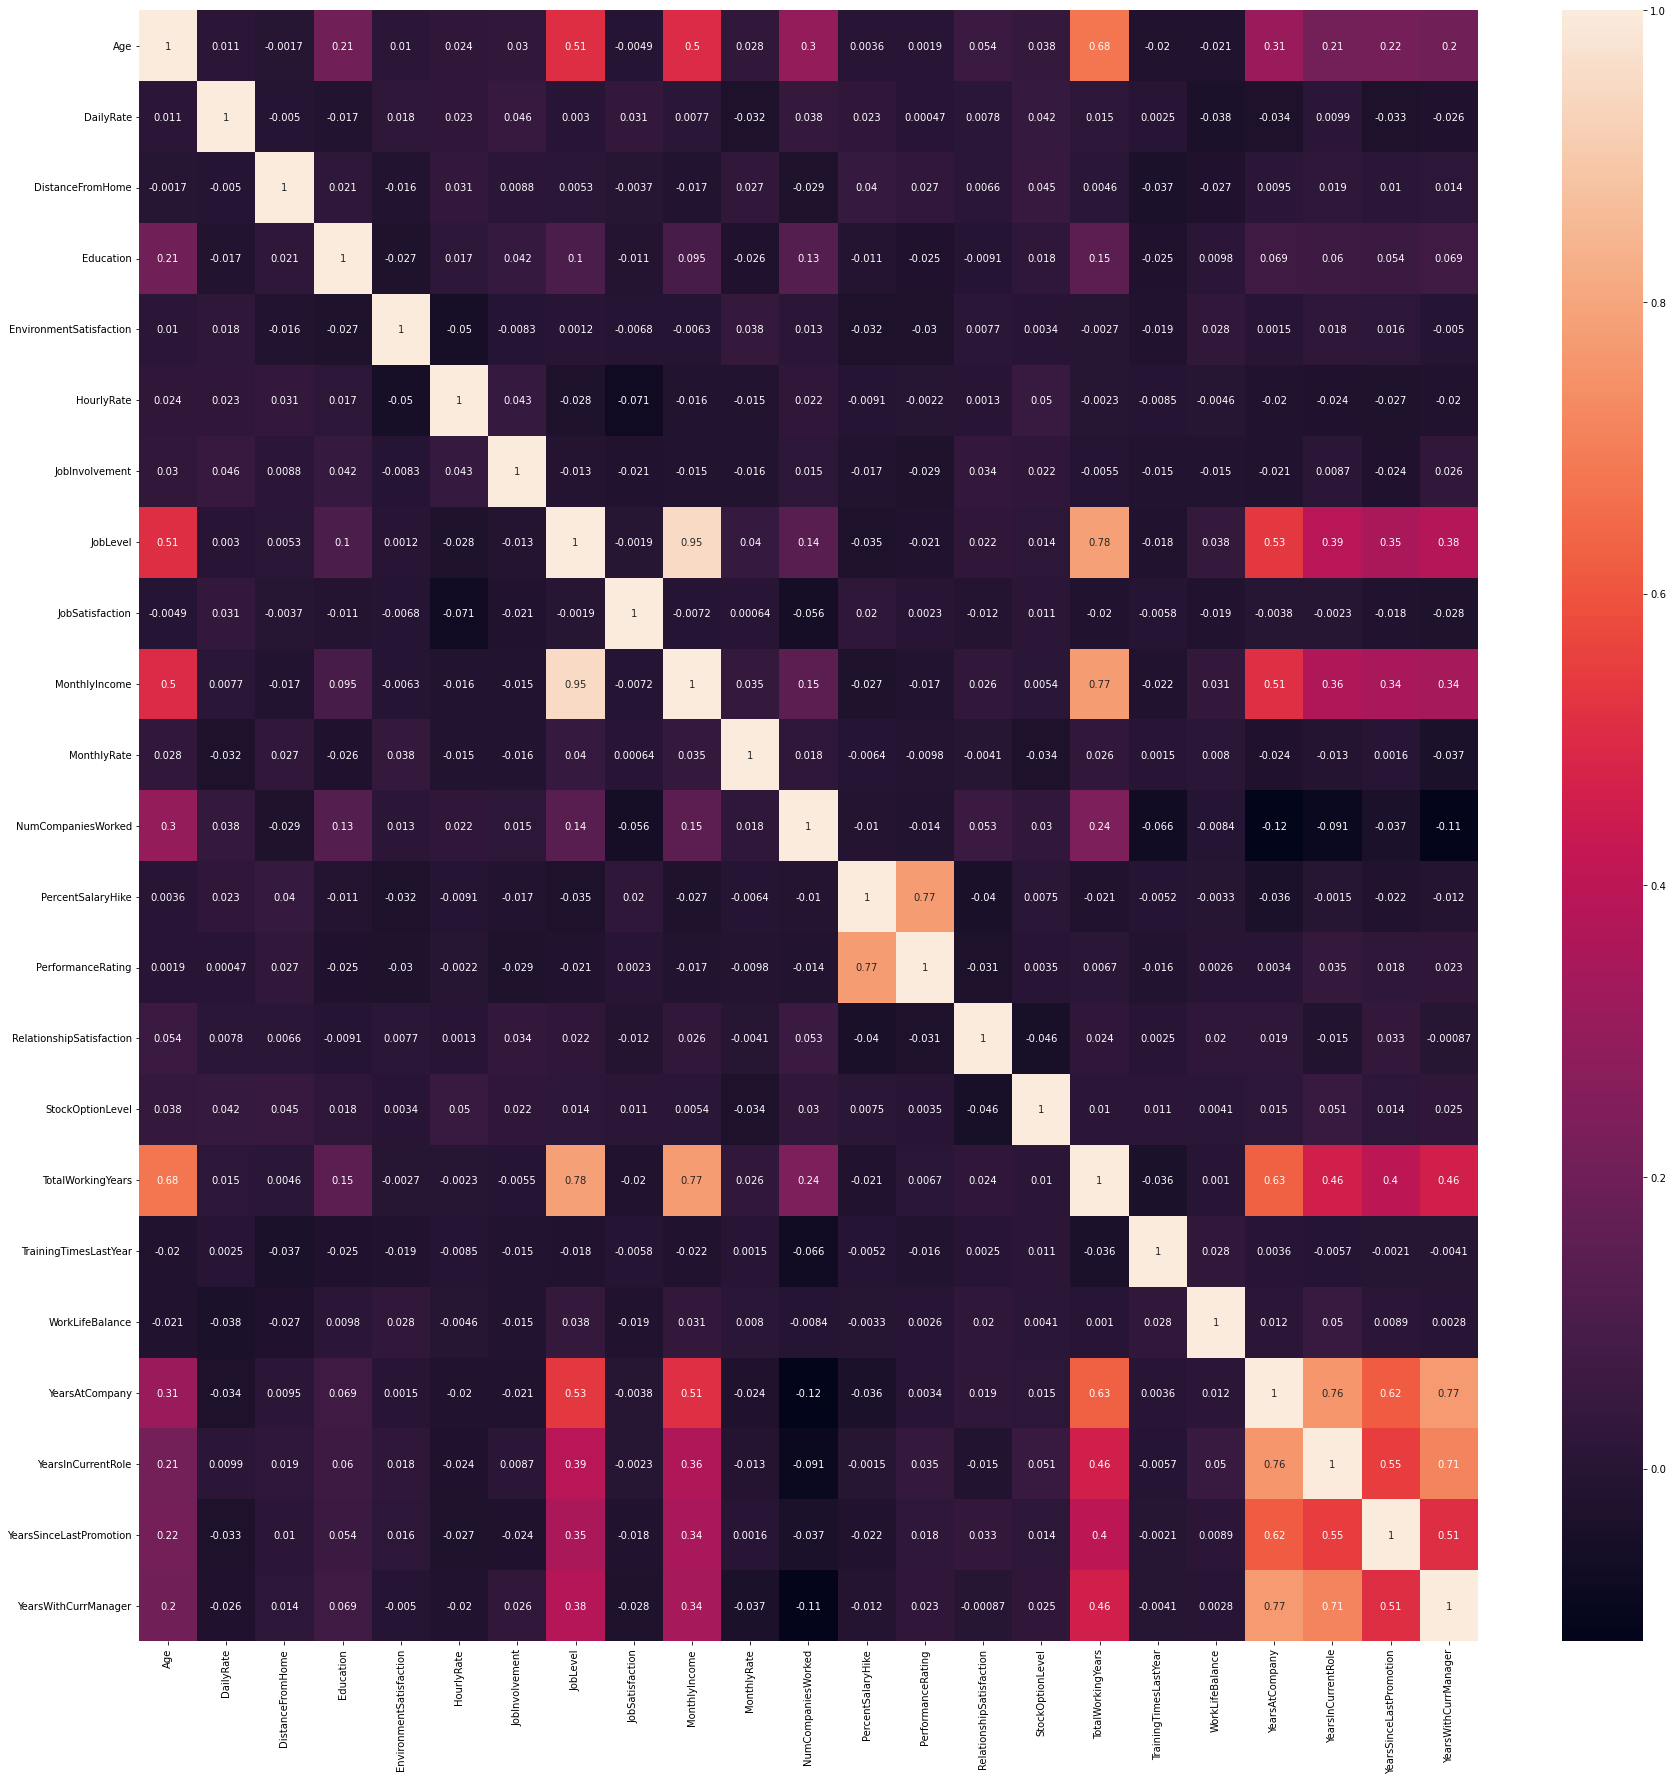

In [36]:
plt.figure(figsize=(30,30))
sns.heatmap(data=df2.corr(),annot=True)
plt.show()
#used to find the correlation between columns

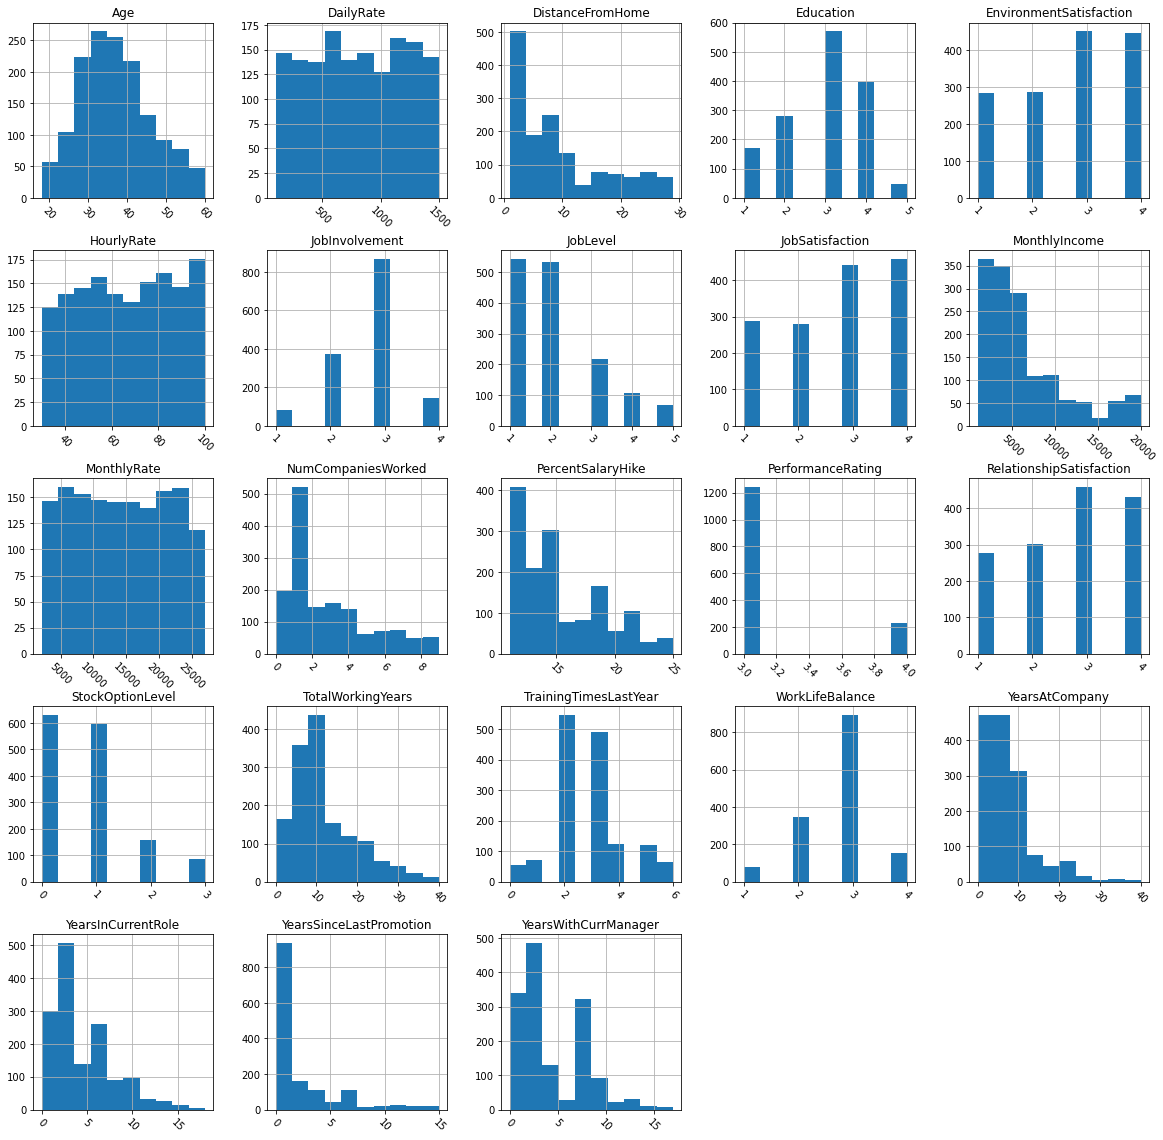

In [37]:
df2.hist(figsize=(20, 20), xrot=-45)
plt.show()

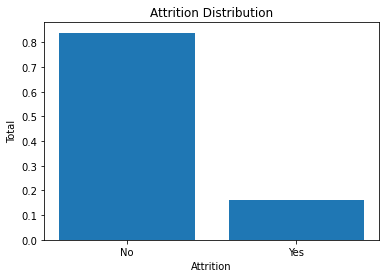

In [38]:
attrition_counts = df['Attrition'].value_counts(normalize=True)
plt.bar(attrition_counts.index, attrition_counts.values)
plt.xlabel('Attrition')
plt.ylabel('Total')
plt.title('Attrition Distribution')
plt.show()

In [39]:
X=df1.drop(['Attrition_LabelEncoded'],axis=1)

In [40]:
Y=df1['Attrition_LabelEncoded']

## LogisticRegression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()

In [45]:
model.fit(X_train,Y_train)

C:\Users\aysha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report

In [48]:
a=accuracy_score(Y_test,y_pred)

In [49]:
a

0.8253968253968254

In [50]:
precision = precision_score(Y_test, y_pred)

In [51]:
precision

0.5

In [52]:
recall = recall_score(Y_test, y_pred)

In [53]:
recall

0.05194805194805195

In [54]:
f1 = f1_score(Y_test, y_pred)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = random_forest.predict(X_test)

In [59]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

In [60]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8480725623582767
Precision: 0.8125
Recall: 0.16883116883116883
F1 Score: 0.2795698924731183


## SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [ ]:
svm_classifier.fit(X_train, Y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)